<a href="https://colab.research.google.com/github/vinuka03/machine-learning-CourseWork/blob/Model/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')

print(data.head())

# Check for data types and missing values
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

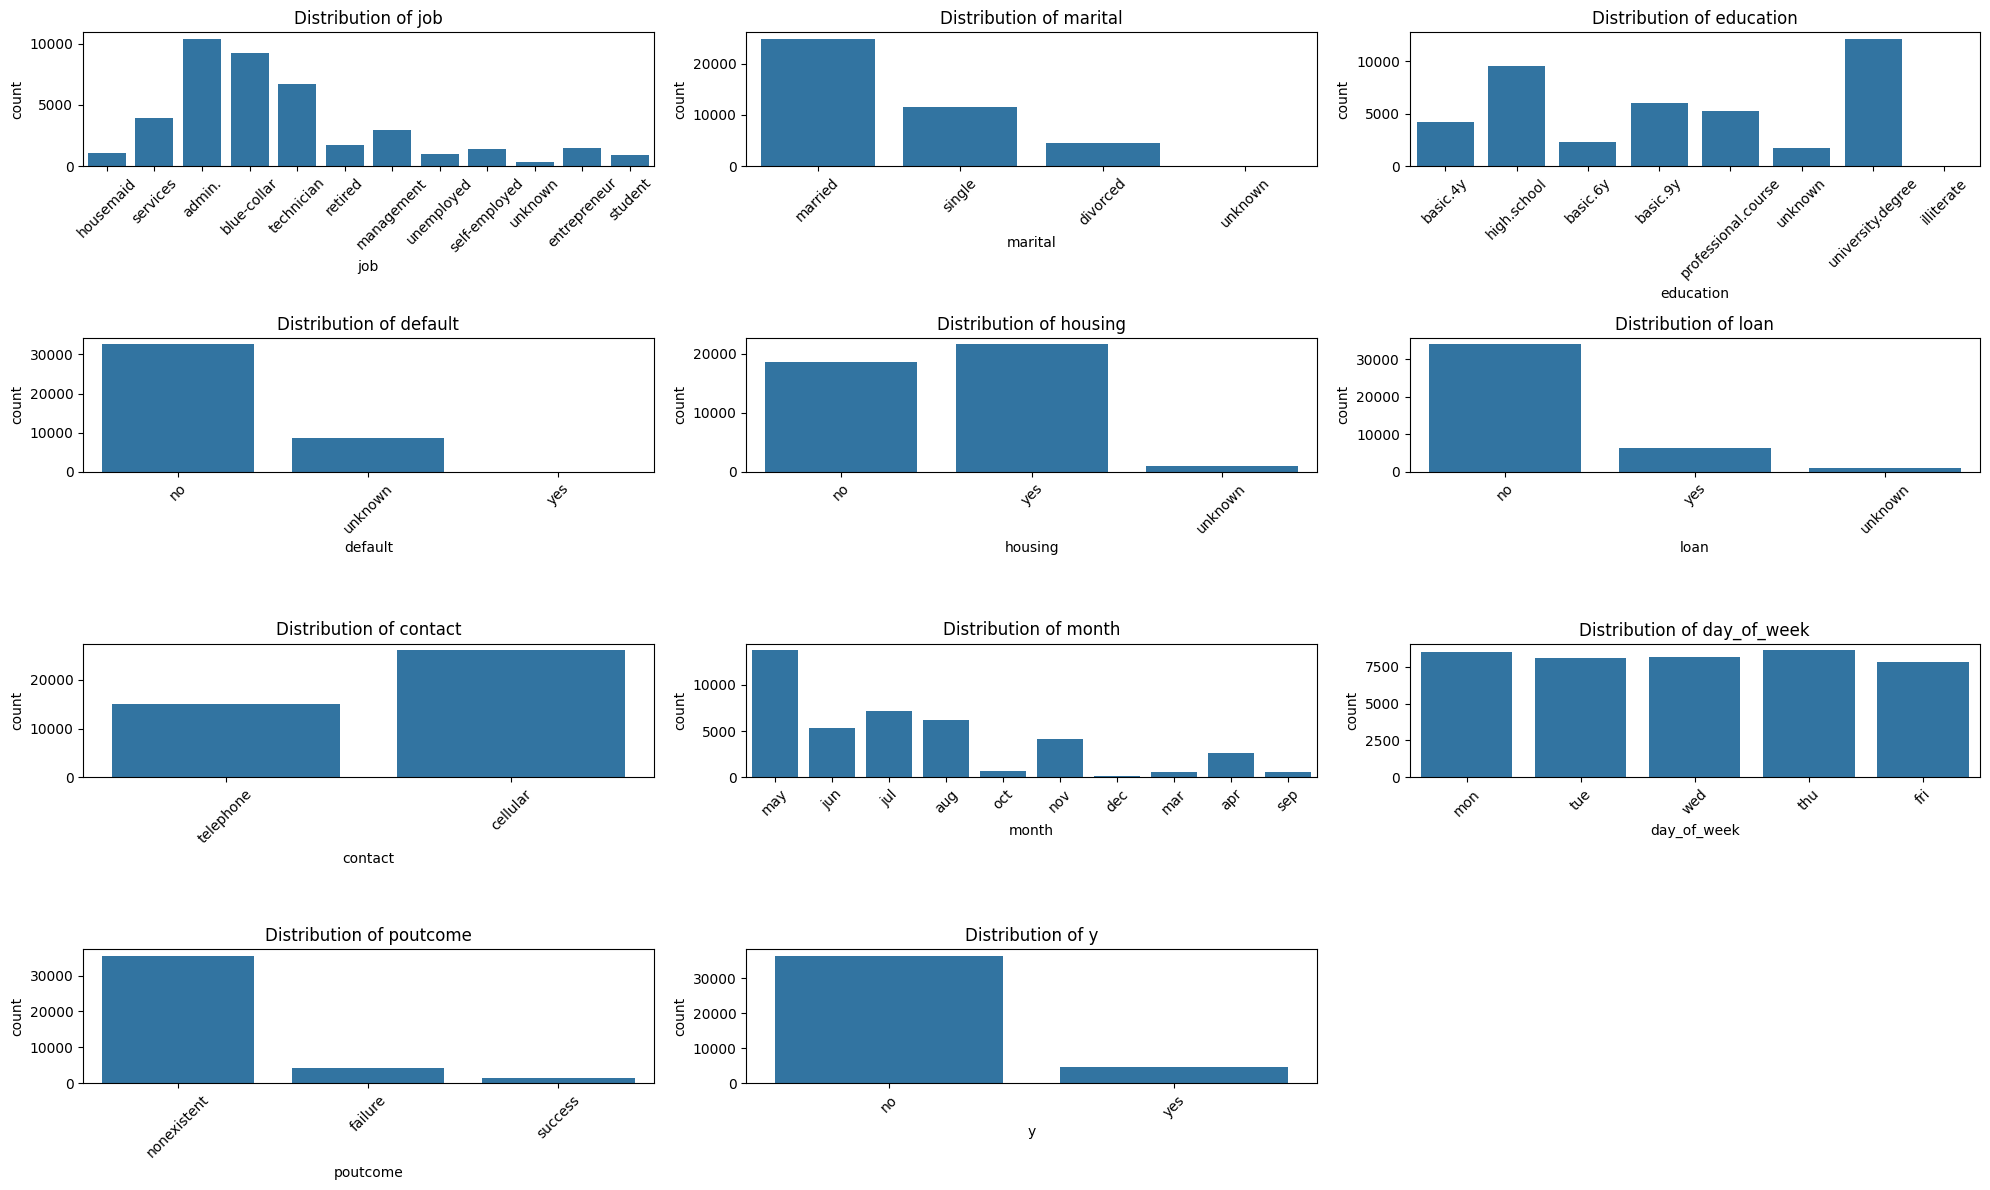

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns needed for subplots based on the number of categorical columns
num_cols = len(categorical_cols)
ncols = 3
nrows = (num_cols // ncols) + (num_cols % ncols > 0)

# Create subplots for categorical features
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.countplot(data=data, x=col, orient='h')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np


numeric_cols = data.select_dtypes(include=[np.number]).columns

# Print the list of numerical columns
print("Numerical features:", list(numeric_cols))

# Display the first few rows of numerical features for examples
print("\nExamples of numerical features:")
print(data[numeric_cols].head())


Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Examples of numerical features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  


In [5]:
import pandas as pd
import numpy as np



# Identify numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Identify discrete features by checking the number of unique values
discrete_cols = [col for col in numeric_cols if len(data[col].unique()) < 25]  # You can adjust the threshold

# Print the list of discrete columns
print("Discrete features:", discrete_cols)

# Display the first few rows of discrete features for examples
print("\nExamples of discrete features:")
print(data[discrete_cols].head())


Discrete features: ['previous', 'emp.var.rate', 'nr.employed']

Examples of discrete features:
   previous  emp.var.rate  nr.employed
0         0           1.1       5191.0
1         0           1.1       5191.0
2         0           1.1       5191.0
3         0           1.1       5191.0
4         0           1.1       5191.0


In [6]:
import pandas as pd
import numpy as np



# Identify numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Identify continuous features by checking the number of unique values
continuous_cols = [col for col in numeric_cols if len(data[col].unique()) >= 20]  # You can adjust the threshold

print("Continuous features:", continuous_cols)

# Display the first few rows of continuous features for examples
print("\nExamples of continuous features:")
print(data[continuous_cols].head())


Continuous features: ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

Examples of continuous features:
   age  duration  campaign  pdays  cons.price.idx  cons.conf.idx  euribor3m
0   56       261         1    999          93.994          -36.4      4.857
1   57       149         1    999          93.994          -36.4      4.857
2   37       226         1    999          93.994          -36.4      4.857
3   40       151         1    999          93.994          -36.4      4.857
4   56       307         1    999          93.994          -36.4      4.857


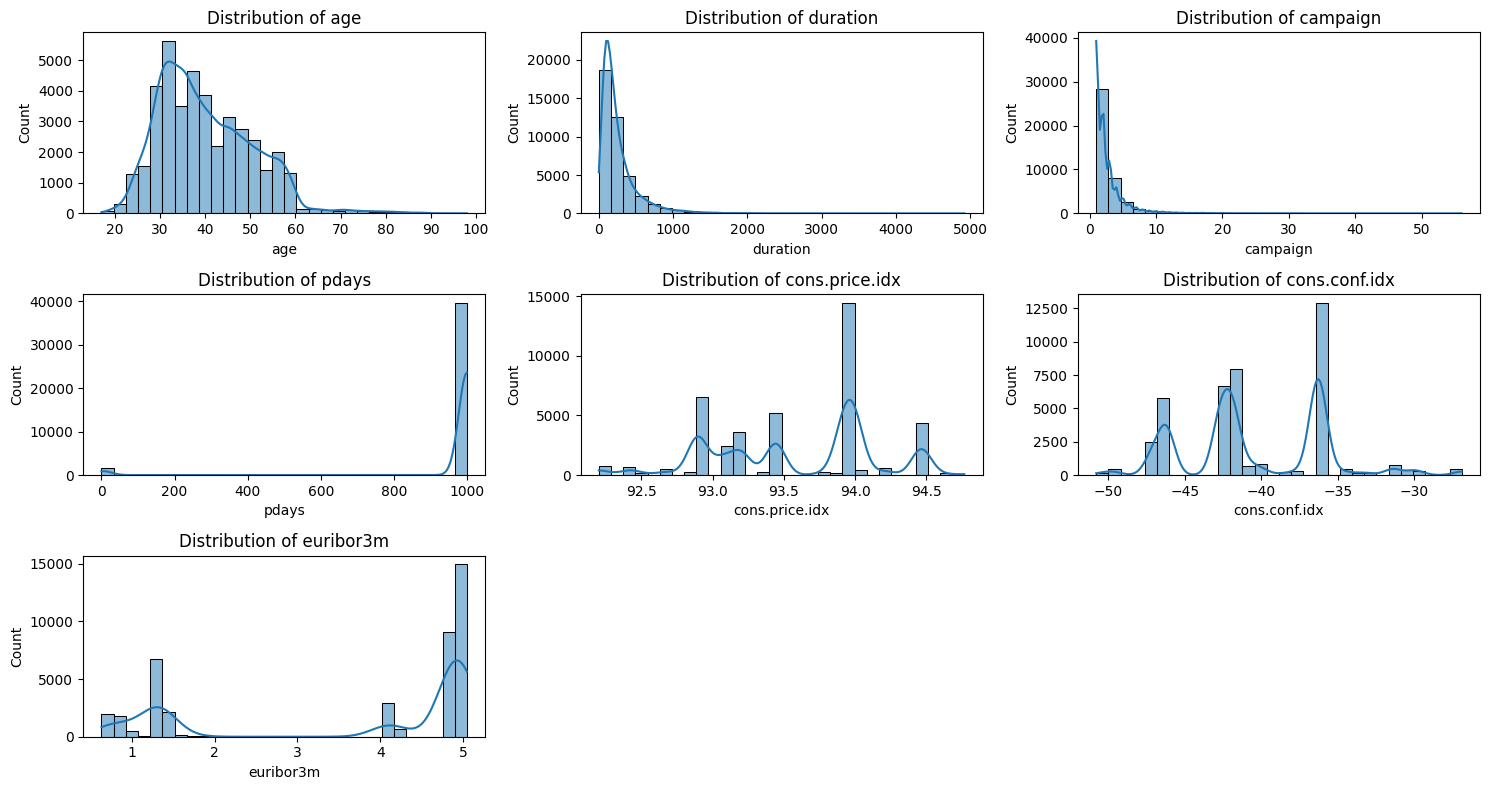

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Identify numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Identify continuous features by checking the number of unique values
continuous_cols = [col for col in numeric_cols if len(data[col].unique()) >= 20]  # Adjust threshold as needed

# Create a figure with subplots for continuous features
plt.figure(figsize=(15, 8))

# Plot the distribution of each continuous feature
for i, col in enumerate(continuous_cols):
    plt.subplot(len(continuous_cols) // 3 + 1, 3, i + 1)  # Dynamic subplot grid
    sns.histplot(data[col], kde=True, bins=30)  # Plot histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [8]:
# Count the "unknown" in each column
unknown_counts = data.apply(lambda col: col[col == "unknown"].count())

# Display the counts of "unknown" values
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [9]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Display the counts of null values
print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

data = data.drop_duplicates()


Number of duplicate rows: 12


In [11]:
# Filter out rows with "unknown" in the loan and housing columns
data = data[(data['loan'] != 'unknown') & (data['housing'] != 'unknown')]

# Verify the number of remaining rows
print(f"Remaining rows after filtering: {len(data)}")

Remaining rows after filtering: 40186


In [12]:
# Drop  'duration' snd 'default' column
data = data.drop(columns=['duration','default'])

# Check the remaining columns
print(f"Remaining columns: {data.columns}")

Remaining columns: Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [13]:
# Check unique values in 'pdays' before transformation
print(data['pdays'].unique())


[999   6   4   3   5   1   0  10   7   9  11   2   8  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [14]:
# Convert 'pdays' to a binary column: 1 if previously contacted, 0 if not
data['pdays'] = (data['pdays'] != 999).astype(int)

print(data['pdays'].value_counts())

# Check unique values in 'pdays' after transformation
print(data['pdays'].unique())


pdays
0    38705
1     1481
Name: count, dtype: int64
[0 1]


<ipython-input-15-edcec1f4e9a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


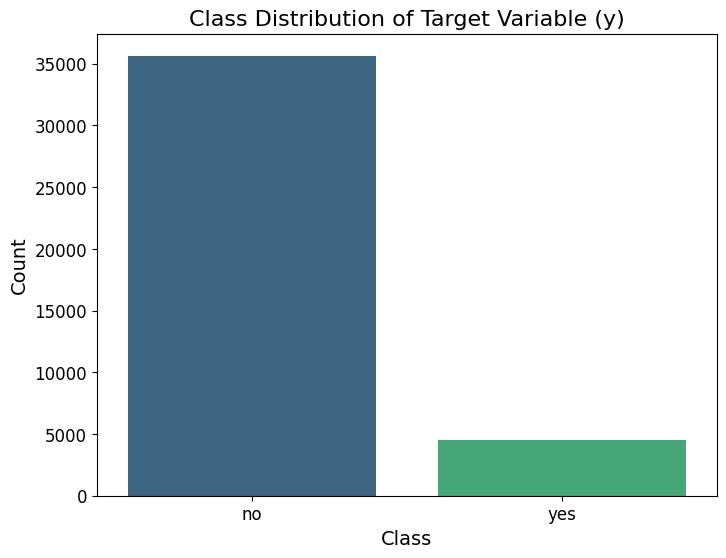

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution of the target variable (y)
class_counts = data['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of Target Variable (y)", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

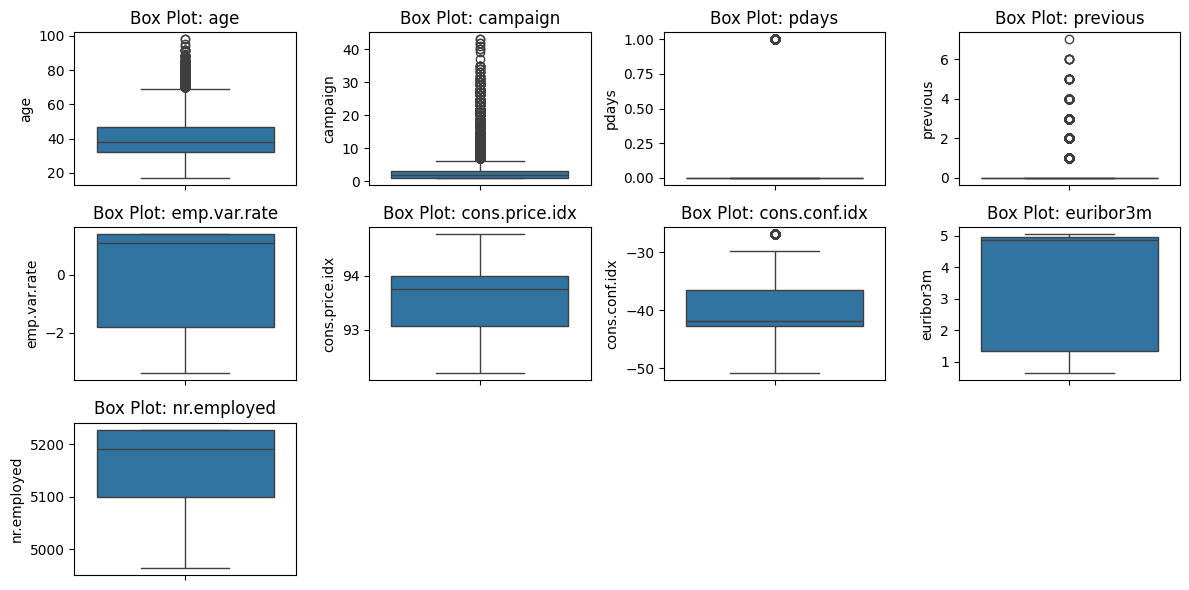

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#  Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns


# Calculate the number of rows and columns needed for subplots based on the number of numeric columns
num_cols = len(numeric_cols)
ncols = 4
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  # Ensure enough rows to fit all columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i + 1)  # Adjust the number of subplots dynamically
    sns.boxplot(data[col])
    plt.title(f'Box Plot: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# List of columns to cap outliers
columns_to_cap = ['cons.conf.idx', 'campaign','age']

# Calculate IQR-based bounds for the selected columns
Q1_selected = data[columns_to_cap].quantile(0.25)
Q3_selected = data[columns_to_cap].quantile(0.75)
IQR_selected = Q3_selected - Q1_selected

# Calculate lower and upper bounds
lower_bound_selected = Q1_selected - 1.5 * IQR_selected
upper_bound_selected = Q3_selected + 1.5 * IQR_selected

# Cap the outliers for the selected columns
for col in columns_to_cap:
    data[col] = np.where(data[col] < lower_bound_selected[col], lower_bound_selected[col], data[col])
    data[col] = np.where(data[col] > upper_bound_selected[col], upper_bound_selected[col], data[col])


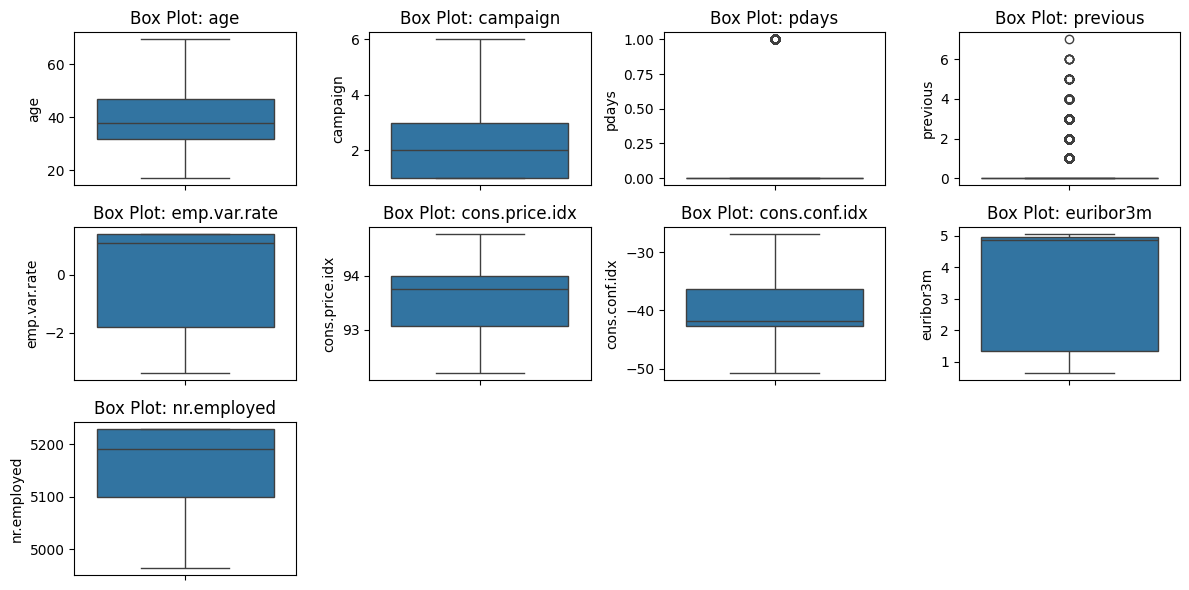

In [18]:

numeric_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots based on the number of numeric columns
num_cols = len(numeric_cols)
ncols = 4
nrows = (num_cols // ncols) + (num_cols % ncols > 0)

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Box Plot: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


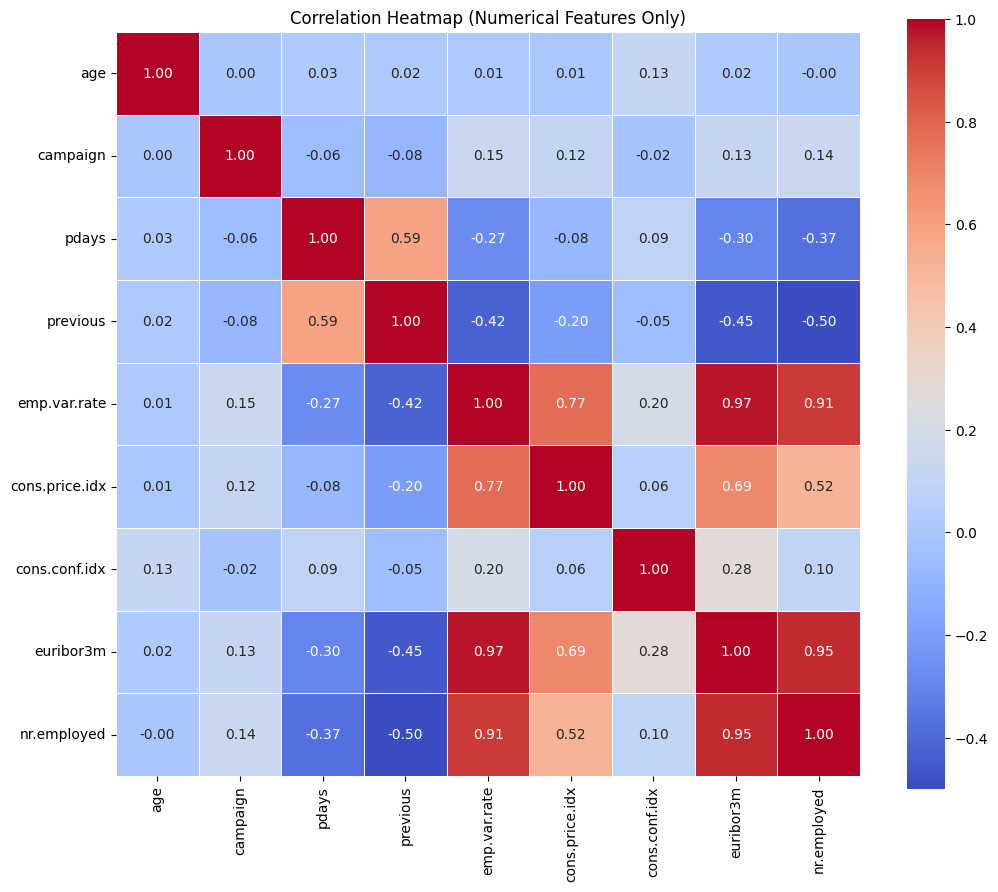

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()


In [20]:
# Drop the 'emp.var.rate' column from the data
data = data.drop(columns=['emp.var.rate'])



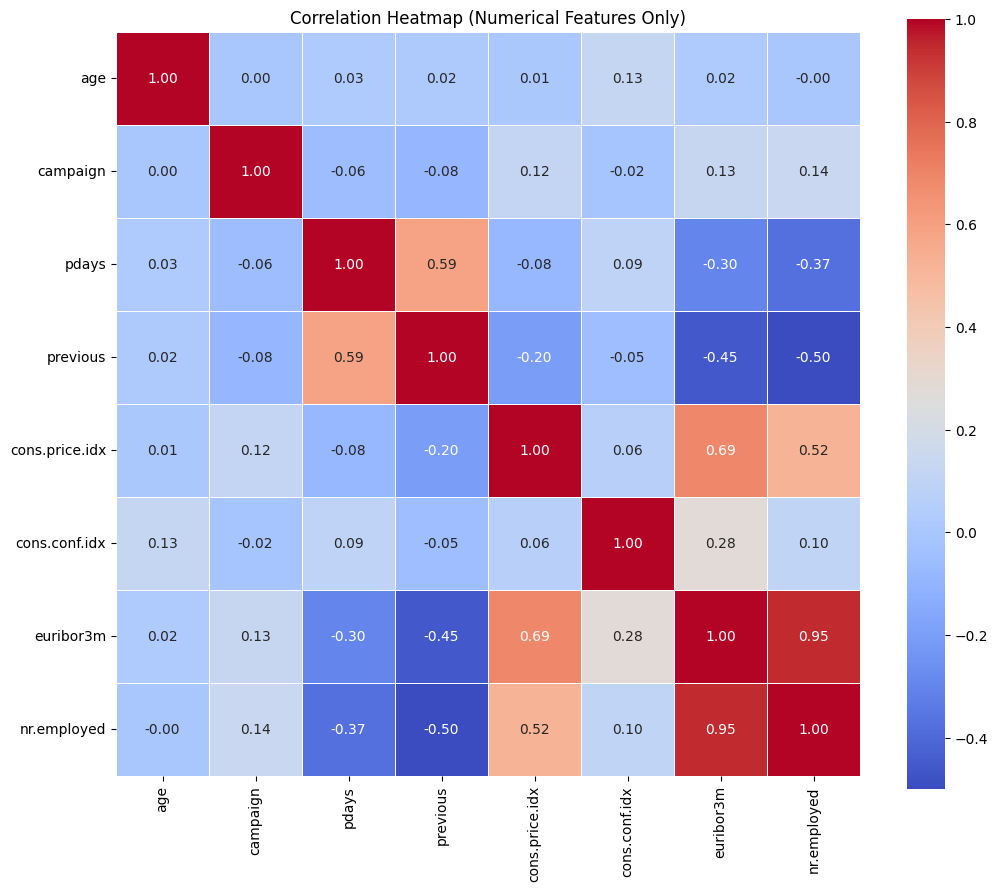

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

In [22]:
import pandas as pd



# List of categorical columns
categorical_cols = ['job', 'marital', 'education',  'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols )

data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

# Verify the encoded data
print("Shape of Encoded Data:", data_encoded.shape)
print(data_encoded.head())

# Check for non-numeric columns
print(data_encoded.dtypes)


Shape of Encoded Data: (40186, 57)
    age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  euribor3m  \
0  56.0       1.0      0         0          93.994          -36.4      4.857   
1  57.0       1.0      0         0          93.994          -36.4      4.857   
2  37.0       1.0      0         0          93.994          -36.4      4.857   
3  40.0       1.0      0         0          93.994          -36.4      4.857   
4  56.0       1.0      0         0          93.994          -36.4      4.857   

   nr.employed  y  job_admin.  ...  month_oct  month_sep  day_of_week_fri  \
0       5191.0  0       False  ...      False      False            False   
1       5191.0  0       False  ...      False      False            False   
2       5191.0  0       False  ...      False      False            False   
3       5191.0  0        True  ...      False      False            False   
4       5191.0  0       False  ...      False      False            False   

   day_of_week_mon  d

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8378 - loss: 0.6698 - val_accuracy: 0.2821 - val_loss: 1.7379
Epoch 2/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8739 - loss: 0.5362 - val_accuracy: 0.3169 - val_loss: 1.5848
Epoch 3/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8737 - loss: 0.5037 - val_accuracy: 0.3781 - val_loss: 1.4436
Epoch 4/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8752 - loss: 0.4714 - val_accuracy: 0.3401 - val_loss: 1.5141
Epoch 5/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8775 - loss: 0.4430 - val_accuracy: 0.3455 - val_loss: 1.4734
Epoch 6/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8779 - loss: 0.4236 - val_accuracy: 0.3428 - val_loss: 1.4650
Epoch 7/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8787 - loss: 0.4091 - val_accuracy: 0.3366 - val_loss: 1.4560
Epoch 8/50
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8785 - loss: 0.3995 - 

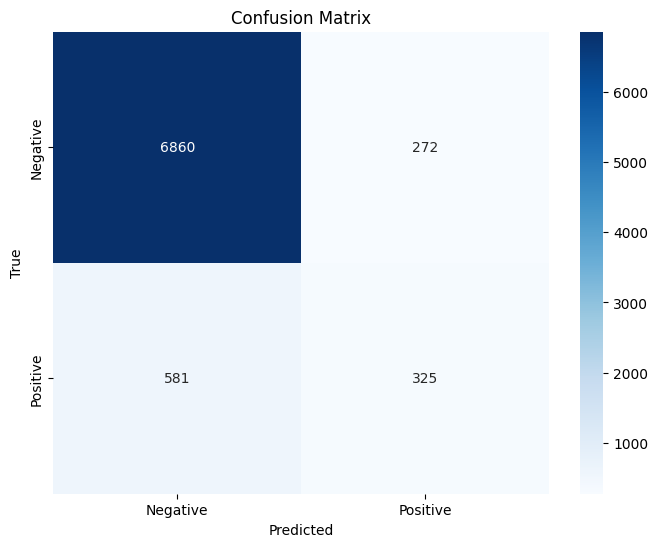

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data_encoded.drop('y', axis=1)  # Features
y = data_encoded['y']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training set
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define  neural network model with fewer hidden layers
model = Sequential([
   Dense(256, input_dim=X_train_smote.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
   Dropout(0.2),
   Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
   Dropout(0.2),
   Dense(64, activation='relu'),
   Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, validation_split=0.1, epochs=50, batch_size=32, verbose=1)

# Predict on the scaled test set
y_test_pred_proba = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Evaluate training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
